In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [2]:
batch_size = 128
nb_classes = 10  #0 to 9 digits

img_rows, img_cols = 28,28


(X_train, y_train), (X_test, y_test) = mnist.load_data()

15286272/15296311 [============================>.] - ETA: 0s

In [3]:
X_train = X_train.reshape(X_train.shape[0],1,img_rows,img_cols)

In [9]:
X_test = X_test.reshape(X_test.shape[0],1,img_rows,img_cols)

In [10]:
X_train = X_train.astype('float64')
X_test  = X_test.astype('float64')
X_train /= 255.
X_test  /= 255.

In [12]:
y_train = np_utils.to_categorical(y_train, nb_classes)

In [15]:
y_test = np_utils.to_categorical(y_test, nb_classes)

In [17]:
y_test.shape

(10000, 10)

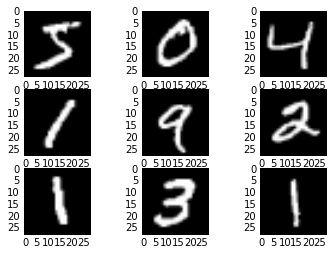

In [19]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i,0], cmap = 'gray')

In [20]:
# 5 layer deep neural net with 2 connected layers

model = Sequential()
model.add(Convolution2D(6,5,5, input_shape = (1,img_rows, img_cols), border_mode='same'))
model.add(Activation('relu'))
#max value of pool size
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(6,5,5, border_mode='same'))
model.add(Activation('relu'))
#max value of pool size
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(120,5,5))
model.add(Activation('relu'))
#max value of pool size
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
#the total probability to 1
model.add(Activation('softmax'))

In [21]:
model.compile(loss = 'categorical_crossentropy', optimizer='adadelta')

In [27]:
nb_epoch = 2

model.fit(X_train, y_train, batch_size= batch_size, nb_epoch= nb_epoch,
         show_accuracy = True, verbose =1, validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, show_accuracy= True, verbose = 0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
  384/60000 [..............................] - ETA: 31s - loss: 0.1544

/home/saraswathi/anaconda3/lib/python3.5/site-packages/keras/models.py:580: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


60000/60000 [==============================] - 28s - loss: 0.0986 - val_loss: 0.0475
Epoch 2/2
60000/60000 [==============================] - 30s - loss: 0.0905 - val_loss: 0.0432


/home/saraswathi/anaconda3/lib/python3.5/site-packages/keras/models.py:621: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


In [23]:
score

0.081459224191308022

9/9 [==============================] - 0s


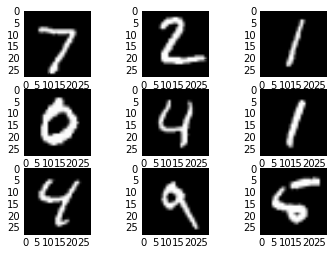

In [28]:
results = model.predict_classes(X_test[:9])
plt.Figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i,0], cmap='gray')
